In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [53]:
# Lectura de datos en python y lo cargamos en la variable que nombramos (Archivo)
Archivo = pd.read_csv('./car details v3.csv')

In [54]:
# Lectura de los datos para el analisis exploratorio 
Archivo.head (5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [55]:
# Descripción de los datos 
Archivo.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [56]:
#Aqui se nombró la variable independiente y la variable dependiente
x=Archivo['year']
y=Archivo['km_driven']

In [57]:
#uso de la libreria scipy para calcular los valores de la regresion lineal 
slope, intercept, r, p,std_err = stats.linregress(x, y)

In [58]:
# Obtener los coeficientes del modelo
print("Pendiente (slope):", slope)
print("Intercepto:", intercept)
print("Coeficiente de correlación (r):", r)
print("Valor p:", p)
print("Error estándar de la estimación:", std_err)

Pendiente (slope): -5844.953245018679
Intercepto: 11840409.798740342
Coeficiente de correlación (r): -0.4180055331724098
Valor p: 0.0
Error estándar de la estimación: 140.91557351065148


In [59]:
#se implemento un metodo para calcular los valores de la regresion lineal, Utilizando la pendiente y la intersección 
def regresionLineal(x):
    return slope * x + intercept

In [60]:
# se realizo un mapeo en base a los datos calculados 
mapeo = list(map(regresionLineal, x))
print(mapeo)

[68673.96327272244, 68673.96327272244, 115433.58923287317, 92053.77625279687, 109588.63598785363, 51139.10353766754, 109588.63598785363, 144658.35545796528, 86208.8230077792, 74518.91651774198, 68673.96327272244, 121278.54247789085, 97898.72949781641, 109588.63598785363, 97898.72949781641, 56984.05678268522, 56984.05678268522, 80363.86976275966, 138813.4022129476, 56984.05678268522, 86208.8230077792, 51139.10353766754, 62829.01002770476, 80363.86976275966, 45294.150292648, 56984.05678268522, 51139.10353766754, 74518.91651774198, 97898.72949781641, 45294.150292648, 51139.10353766754, 132968.44896792807, 80363.86976275966, 45294.150292648, 51139.10353766754, 39449.197047630325, 39449.197047630325, 39449.197047630325, 56984.05678268522, 86208.8230077792, 80363.86976275966, 39449.197047630325, 45294.150292648, 74518.91651774198, 45294.150292648, 45294.150292648, 45294.150292648, 68673.96327272244, 74518.91651774198, 68673.96327272244, 62829.01002770476, 74518.91651774198, 62829.01002770476

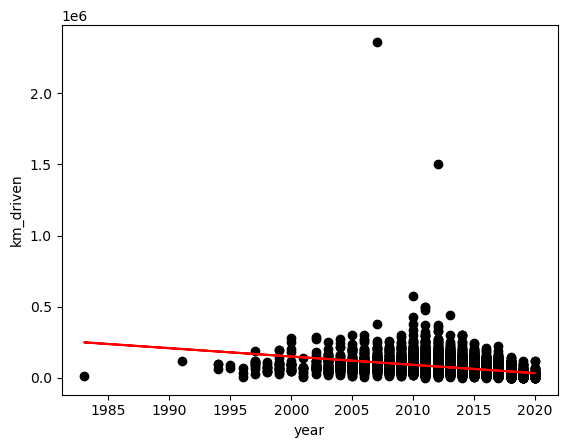

In [61]:
# se crea un grafico en base al mapeo realizado anteriormente, El mapeo nos sirve para trazar la linea de regresión 
plt.scatter(x, y, color= "black")
plt.xlabel("year")
plt.ylabel("km_driven")
plt.plot(x, mapeo, "-r")

<h1>regresion lineal utilizando el train y el test</h1>

In [72]:
# Restablecer configuraciones de plt
plt.clf()
plt.close()
Archivo_dos=pd.read_csv('./car details v3.csv',header=0,sep=',');

In [73]:
#separar las caracteristicas x y el objetivo y
X = Archivo_dos[["year", "km_driven"]]  # Tomar las columnas "year" y "Km_driven"
y = Archivo_dos["selling_price"]

In [74]:
# se dividen los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
#se creo la instancia de la regresion lineal
modelo_regresion=LinearRegression()
# se ajusta el modelo a los datos de entrenamiento
modelo_regresion.fit(X_train,y_train)

LinearRegression()

In [77]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio:", mse)

# Imprimir los coeficientes y el sesgo - Valores de los pesos del modelo de regresión
print("Coeficientes:", modelo_regresion.coef_)
print("Sesgo (Coeficiente W0:", modelo_regresion.intercept_)
print("Coeficiente W1:", modelo_regresion.coef_[0])
print("Coeficiente W2:", modelo_regresion.coef_[1])

# Imprimir el coeficientes de determinación
print("Coeficiente de determinación:", modelo_regresion.score(X_train, y_train))

Error cuadrático medio: 539833998161.54584
Coeficientes: [ 7.72576778e+04 -8.19627271e-01]
Sesgo (Coeficiente W0: -154885229.7856074
Coeficiente W1: 77257.67775367392
Coeficiente W2: -0.8196272714664082
Coeficiente de determinación: 0.17434308011662025


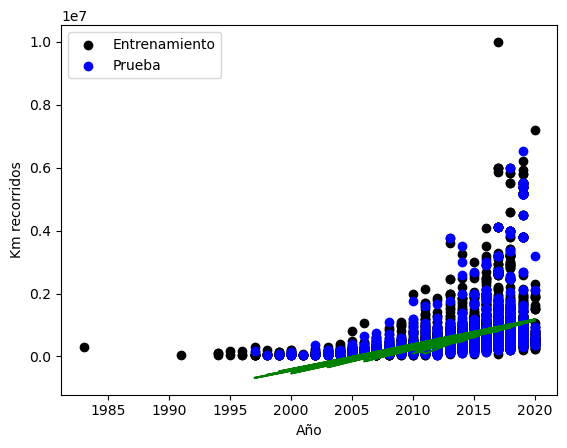

In [67]:
# Hacer predicciones en los datos de prueba
predicciones = modelo_regresion.predict(X_test)

# Graficar los datos de entrenamiento y la línea de regresión
plt.scatter(X_train["year"], y_train, color="black", label="Entrenamiento")
plt.scatter(X_test["year"], y_test, color="blue", label="Prueba")
plt.plot(X_test["year"], predicciones, color="gr")
plt.xlabel("Año")
plt.ylabel("Km recorridos")
plt.legend()
plt.show()